In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests
import time

In [2]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
from citipy import citipy

In [3]:
# Starting URL for Weather Map API Call.
#setting value for number of calls, (to check code with smaller set and avoid hitting API limitations)
NUM_CALLS=1500

params = {"units": "Imperial",
    "APPID": weather_api_key,
    "q": "Boston"} #q is city
#params
#base_url = "https://jsonplaceholder.typicode.com/" #Dummy placeholder, exceeded limit for a 60 calls a minute
base_url = "http://api.openweathermap.org/data/2.5/weather"



In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=NUM_CALLS)
lngs = np.random.uniform(low=-180.000, high=180.000, size=NUM_CALLS)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#coordinates
# Create a list for holding the cities.
cities = []
failed_cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Create an empty list to hold the weather data.
city_data = []
skipped_cities = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(65) #Need to sleep 60 seconds so calls don't stop
    # Create endpoint URL with each city.
    #city_url = base_url + "&q=" + city.replace(" ","+") needing + is deprecated, using dictionary of params
    params['q'] = city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(base_url, params).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print(f"{city.title()} not found. Skipping...")
        skipped_cities.append({"City": city.title(),
            "Coords": coordinates[(set_count-1)*10+record_count-1]})
        #pass We are catching errors, commenting out pass!

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 1 of Set 1 | santa cruz
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | dickinson
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | dikson
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | kongsberg
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | karavayevo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | killybegs
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | saint-augustin
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | villa nueva
-----------------------------
Data R

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 2 | zhanatas
Zhanatas not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | seoul
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | binulasan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | tuktoyaktuk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | port alfred
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | natal
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | evensk
-----------------------------
Data Retrieval Complet

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 3 | mount gambier
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 3 | ordynskoye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 3 | tezu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | newport
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | tumannyy
Tumannyy not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | ust-uda
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | pervomayskoye
-----------------------------
Data Retrieval 

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 4 | quatre cocos
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 4 | bathsheba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 4 | rio grande
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 4 | namibe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | kiama
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | gazalkent
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | kijang
-----------------------------
Data Retrieval Complete      
----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 5 | taltal
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 5 | aklavik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 5 | iqaluit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 5 | prince rupert
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | lamar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | la ronge
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | derac
-----------------------------
Data Retrieval Complete      
-----------------------------


-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 7 | mahina
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 7 | salamiyah
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 7 | zhangye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | xining
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | pithapuram
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | aras
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | bonavista
-----------------------------
Data Retrieval Complete      
-----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 8 | morondava
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 8 | bethel
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 8 | manzhouli
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 8 | tarudant
Tarudant not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | lompoc
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | harwich
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | lima
-----------------------------
Data Retrieval Complete     

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 9 | koson
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 9 | yuzhno-kurilsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 9 | tabiauea
Tabiauea not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 9 | malatya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | beringovskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | guymon
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | djambala
-----------------------------
Data Retrieval Co

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 10 | kamenskoye
Kamenskoye not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 10 | gadwal
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 10 | khowst
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 10 | batagay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 10 | camargo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | wampusirpi
Wampusirpi not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | tabou
-------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 12 | beloha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 12 | kearney
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 12 | acin
Acin not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 12 | palmer
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 12 | viedma
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | faya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | rumphi
-----------------------------
Data Retrieval Complete      
----------

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santa Cruz,-17.8000,-63.1667,64.40,88,75,13.80,BO,2021-03-28 07:50:00
1,Dickinson,29.4608,-95.0513,73.40,94,90,4.34,US,2021-03-28 07:54:28
2,Dikson,73.5069,80.5464,-10.82,94,78,10.85,RU,2021-03-28 07:54:28
3,Kongsberg,59.6652,9.6465,36.00,84,100,2.42,NO,2021-03-28 07:54:22
4,Karavayevo,55.2961,37.9622,44.60,49,0,4.47,RU,2021-03-28 07:54:28
5,Killybegs,54.6333,-8.4500,46.00,100,90,4.61,IE,2021-03-28 07:54:29
6,Saint-Augustin,51.2260,-58.6502,-10.55,90,47,6.76,CA,2021-03-28 07:54:29
7,Villa Nueva,14.5269,-90.5875,62.60,82,0,11.50,GT,2021-03-28 07:54:29
8,Mataura,-46.1927,168.8643,55.00,95,100,5.99,NZ,2021-03-28 07:54:29
9,Sisimiut,66.9395,-53.6735,-10.53,80,39,10.47,GL,2021-03-28 07:54:30


In [9]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Santa Cruz,75,BO,2021-03-28 07:50:00,88,-17.8000,-63.1667,64.40,13.80
1,Dickinson,90,US,2021-03-28 07:54:28,94,29.4608,-95.0513,73.40,4.34
2,Dikson,78,RU,2021-03-28 07:54:28,94,73.5069,80.5464,-10.82,10.85
3,Kongsberg,100,NO,2021-03-28 07:54:22,84,59.6652,9.6465,36.00,2.42
4,Karavayevo,0,RU,2021-03-28 07:54:28,49,55.2961,37.9622,44.60,4.47
5,Killybegs,90,IE,2021-03-28 07:54:29,100,54.6333,-8.4500,46.00,4.61
6,Saint-Augustin,47,CA,2021-03-28 07:54:29,90,51.2260,-58.6502,-10.55,6.76
7,Villa Nueva,0,GT,2021-03-28 07:54:29,82,14.5269,-90.5875,62.60,11.50
8,Mataura,100,NZ,2021-03-28 07:54:29,95,-46.1927,168.8643,55.00,5.99
9,Sisimiut,39,GL,2021-03-28 07:54:30,80,66.9395,-53.6735,-10.53,10.47


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
#write error's out here
output_data_file = "weather_data/skippedcities.csv"
skipped_cities_df = pd.DataFrame(skipped_cities)
# Export the City_Data into a CSV.
skipped_cities_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

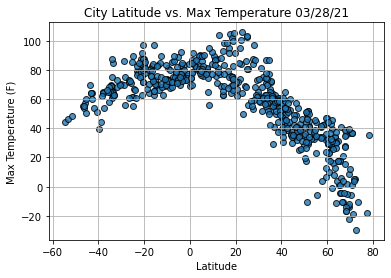

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

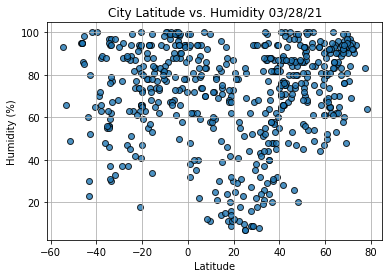

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

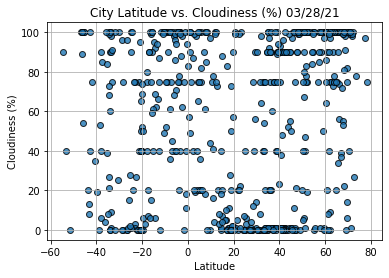

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

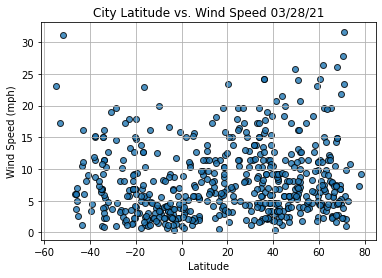

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()